# Generating Overfit Tree Models

### Objective
The objective of this notebook is to explore the behavior of scikit-learn decision tree models with respect to overfitting by adjusting the max_depth parameter. The analysis will involve building multiple models with varying depths, from max_depth = 1 until the tree is fully grown, and tracking the accuracy on both training and test data. The results will be visualized in a plot with tree depths on the horizontal axis and accuracy on the vertical axis for both training and test sets. This process will be repeated with different data splits to identify the depth at which the decision tree begins to overfit

### Analysis Outline


#### Import Required Libraries.

#### Load the Dataset: 
Load the provided health dataset.

#### Encode String Columns: 
Encode outcome and smoker columns using LabelEncoder

#### Split the Dataset: 
Split the data into training and test sets.

#### Use StandardScaler to standardize the columns. 

#### Train Decision Trees with Different Depths: 
Train decision tree models with varying max_depth parameters.

#### Evaluate Models: 
Calculate the accuracy on both training and test data for each depth.

#### Plot the Results: 
Generate a plot to visualize the training and test accuracy as a function of max_depth.

#### Repeat with Different Splits: 
Repeat the process with different random splits of the data to identify consistent patterns of overfitting.

#### Analyze and Discuss Results: 
Analyze the results to determine the depth at which the model starts to overfit and discuss the consequences of overfitting.

### Step 1: Import Required Libraries

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#load the dataset
data = pd.read_csv(r'C:\Users\agnek\OneDrive\Documents\Educational_Training Materials\Berkeley Haas\Codio\Module14\Whickham.txt')

In [22]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


### Step 2: Encode the Binary Target Features

In [23]:
# Encode the 'outcome' and 'smoker' columns separately
data['outcome'] = label_encoder.fit_transform(data['outcome'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

#Inspect the data ater the encoding 
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   outcome  1314 non-null   int32
 1   smoker   1314 non-null   int32
 2   age      1314 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 20.7 KB


,outcome,smoker,age
0,0,1,23
1,0,1,18
2,1,1,71
3,0,0,67
4,0,0,64


### Step 3: Split the Dataset and Standardize

In [24]:
X = data[['smoker', 'age']]
y = data['outcome']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Step 4: Train Decision Trees with Different Depths


In [31]:
# Define the range of max_depth values
max_depths = range(1, 21)

# Lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train and evaluate a decision tree for each depth
for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # Store accuracy values
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

### Step 5: Plot Accuracy vs Tree Depth Values

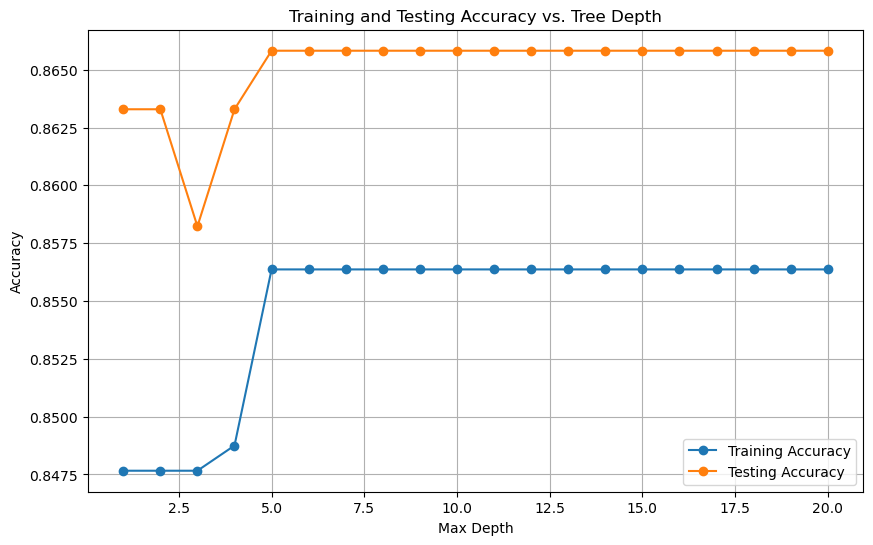

In [32]:
# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation

#### Model Performance Plateau:

The model has reached its maximum capacity to learn from the data at depth 5. Increasing the complexity of the model (by increasing the tree depth) will not provide any additional benefit.

#### No Overfitting or Underfitting:

Since both training and testing accuracies are high and close to each other, it indicates that the model is neither overfitting nor underfitting. The model generalizes well to unseen data.

#### Saturated Learning:

The model has saturated in its learning process. All the patterns and relationships in the data that the model can learn have already been captured at this depth.

### Step 6.Repeat with Different Splits

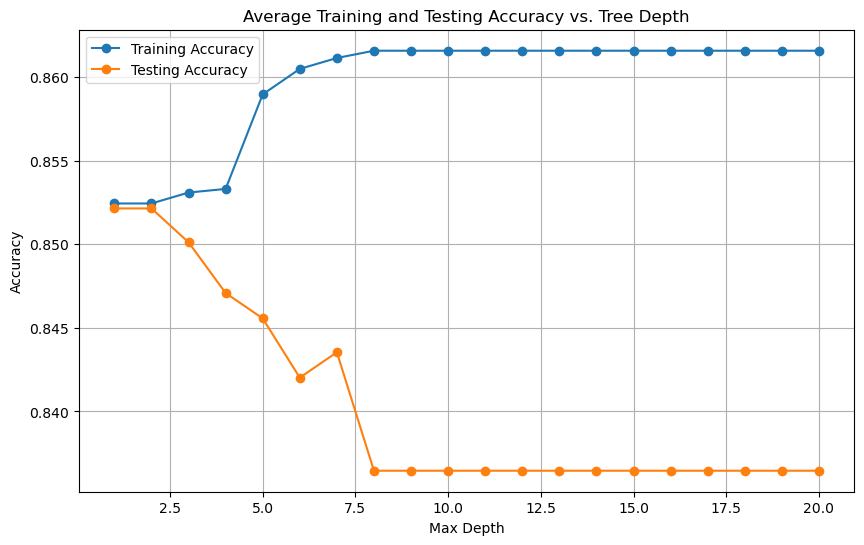

In [33]:
# Function to perform the process with different splits
def evaluate_tree_with_different_splits(X, y, test_size=0.3, iterations=5):
    train_accuracies = np.zeros(len(max_depths))
    test_accuracies = np.zeros(len(max_depths))

    for _ in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)
        for i, depth in enumerate(max_depths):
            model = DecisionTreeClassifier(max_depth=depth, random_state=42)
            model.fit(X_train, y_train)
            train_accuracies[i] += accuracy_score(y_train, model.predict(X_train))
            test_accuracies[i] += accuracy_score(y_test, model.predict(X_test))

    # Average the accuracies
    train_accuracies /= iterations
    test_accuracies /= iterations

    return train_accuracies, test_accuracies

# Perform the evaluation
train_accuracies_avg, test_accuracies_avg = evaluate_tree_with_different_splits(X, y, iterations=5)

# Plot the averaged results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies_avg, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracies_avg, label='Testing Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

### Code Review

#### Function Definition: 
Defines a function named evaluate_tree_with_different_splits' that takes the following parameters:
X: Features of the dataset.
y: Target variable of the dataset.
test_size: Proportion of the dataset to include in the test split (default is 30%).
iterations: Number of times to repeat the process with different data splits (default is 5).

#### Initialize Arrays: 
Creates two numpy arrays, train_accuracies and test_accuracies, each initialized with zeros. The length of these arrays is equal to the number of max_depths values being tested.
These arrays will store the cumulative accuracy scores for the training and test sets, respectively, for each depth.
python

#### for _ in range(iterations):
Loop Over Iterations: Starts a loop that will run iterations times (default is 5). The underscore _ is used as the loop variable because its value is not needed.

#### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)
Split Data: Splits the dataset into training and testing sets using the train_test_split function from scikit-learn.
X_train, X_test: Feature sets for training and testing.
y_train, y_test: Target sets for training and testing.
test_size=test_size: The proportion of the dataset to include in the test split (default is 30%).
random_state=None: Ensures a different random split each time the function runs.

#### for i, depth in enumerate(max_depths):
Loop Over Depths: Starts a loop over the max_depths list, where i is the index and depth is the value of the current maximum depth of the decision tree.

#### model = DecisionTreeClassifier(max_depth=depth, random_state=42)
Initialize Model: Creates an instance of the DecisionTreeClassifier from scikit-learn with the current max_depth and a fixed random_state for reproducibility.

#### model.fit(X_train, y_train)
Train Model: Fits the decision tree model to the training data (X_train, y_train).

#### train_accuracies[i] += accuracy_score(y_train, model.predict(X_train))
Evaluate Training Accuracy: Predicts the training set labels using the trained model and calculates the accuracy score. This score is added to the train_accuracies array at the current index i.

#### test_accuracies[i] += accuracy_score(y_test, model.predict(X_test))
Evaluate Test Accuracy: Predicts the test set labels using the trained model and calculates the accuracy score. This score is added to the test_accuracies array at the current index i.

### Summary

The function evaluate_tree_with_different_splits performs the following tasks:

Initializes arrays to store cumulative accuracy scores for training and testing data.

Repeats the process of splitting the data, training the model, and evaluating accuracy for a specified number of iterations.

For each iteration, it splits the data into training and testing sets.

For each specified tree depth, it trains a decision tree, evaluates its accuracy on both the training and test sets, and accumulates these scores in the corresponding arrays.

After running this function, you would typically average the accumulated accuracies over the number of iterations to get the final average accuracies for each depth.


When the average training accuracy increases while the average testing accuracy starts to decrease at a certain depth (in this case, 2.4), it indicates that the model is beginning to overfit. Overfitting occurs when a model learns the training data too well, including its noise and outliers, at the expense of its performance on new, unseen data. Here’s how to interpret and address this situation:

### Interpretation

#### Training Accuracy Increases:

The model is becoming more complex and fitting the training data more closely. It captures more details, including noise and specific patterns in the training set.

#### Testing Accuracy Decreases:

The model's ability to generalize to unseen data is diminishing. The complexity of the model makes it less effective at predicting outcomes for new data because it is too tailored to the training set.

#### Depth 2.4 (Critical Point):

Depth 2.4 represents the point where the model transitions from underfitting to overfitting. Up to this depth, the model improves its performance on both training and testing sets. Beyond this point, further increases in depth improve the training accuracy but harm the testing accuracy.

### Analysis

#### Overfitting Identification: 
By comparing the training and test accuracies, you can identify the depth at which the model starts to overfit. Typically, overfitting occurs when the training accuracy continues to increase while the test accuracy starts to decrease or plateau.

#### Consequences of Overfitting: 
Overfitting leads to a model that performs well on training data but poorly on unseen data. This reduces the model's generalizability and can result in inaccurate predictions in real-world scenarios.

#### Approach to Building Decision Trees: 
To mitigate overfitting, consider using techniques such as pruning, setting a maximum depth, or using ensemble methods like Random Forests or Gradient Boosting, which combine multiple trees to improve robustness and performance.

By systematically evaluating the impact of tree depth on model performance, you can better understand and address overfitting, leading to more reliable and accurate predictive models.